$f = (e^x + 1)du + e^x dx = 0$
,$u(0) = 0.5$

1. Привести уравнение к нормальной форме $\frac{du}{dx}(x) = f(x, u(x))$

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
sp.init_printing()
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Инициализация символов и уравнения

In [2]:
x = sp.symbols('x')
u = sp.Function('u')
ode = (sp.exp(x) + 1) * u(x).diff(x) + sp.exp(x)

Решение уравнения

In [3]:
sol = sp.dsolve(ode)
sol 

In [4]:
sol = sp.dsolve(ode, ics = {u(0): 1/2})
sol
sol = sp.Equality(u(x), sp.log(2) + 0.5 - sp.log(sp.exp(x) + 1))
u = sp.log(2) + 0.5 - sp.log(sp.exp(x) + 1)

Частное решение задачи Коши (из условия задачи):

$u(x) = \log(2) + 0.5 - \log(e^{x} + 1)$

Приведение уравнения к нормальной форме

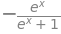

In [5]:
u.diff(x)

Нормальная форма: $\frac{du}{dx} = - \frac{e^{x}}{e^{x} + 1}$

2. Найти приближенное решение по явной разностной схеме Эйлера с точностью $10^{-4}$ , используя оценку погрешности полученного решения по методу Рунге. Построить графики приближенного решения и оценки его погрешности.

In [6]:
# Нормальная форма
def F(x): return -np.exp(x)/(np.exp(x) + 1)
# Частное решение задачи Коши
def F_u(x): return np.log(2) + 0.5 - np.log(np.exp(x) + 1)

In [7]:
def euler(func = F, n = 5000, a = 0, b = 2):
    h = (b - a)/n
    x_k = np.array([0.5])
    for i in range(n):
        t_k = a + i * h
        x_k = np.append(x_k, x_k[i] + h * func(t_k))
    return x_k 

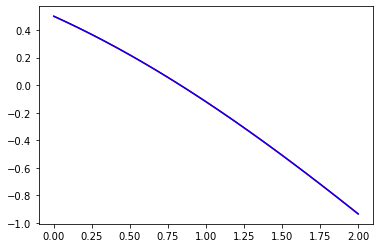

In [8]:
plt.plot(np.linspace(0, 2, 5001), euler(), color = 'red')
plt.plot(np.linspace(0, 2, 100), F_u(np.linspace(0, 2, 100)), color = 'blue')

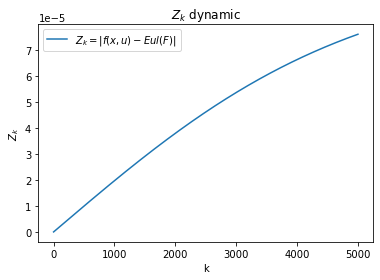

In [9]:
actual = F_u(np.linspace(0, 2, 5001))
Z_k = np.abs(actual - euler())
plt.plot(Z_k, label = r'$Z_k = |f(x, u) - Eul(F)|$')
plt.title(r'$Z_k$ dynamic')
plt.xlabel('k')
plt.ylabel(r'$Z_k$')
plt.legend()

3. Выбрать разностную схему из семейства схем Рунге-Кутты 2-го порядка, взяв конкретное значение параметра. Найти приближенное решение по этой разностной схеме приближенное решение примерно с той же точностью, что, полученное в пункте 2.

In [10]:
def runge_kutt(alpha, n = 5000, func = F, a = 0, b = 2):
    h = (b - a)/n
    x_k = np.array([0.5])
    for i in range(n):
        t_k = a + i * h
        x_k = np.append(x_k, x_k[i] + h *\
                        ((1 - alpha) * func(t_k) + \
                       alpha * func(t_k + h/(2 * alpha) * func(x_k[i]))))
    return x_k

Сравним точность метода Рунге-Кутты с разными параметрами и методом Эйлера

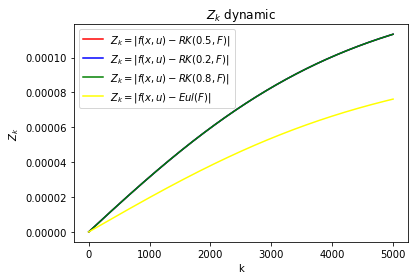

In [11]:
actual = F_u(np.linspace(0, 2, 5001))
plt.plot(np.abs(actual - runge_kutt(0.5)),
         label = r'$Z_k = |f(x, u) - RK(0.5, F)|$',
        color = 'red')
plt.plot(np.abs(actual - runge_kutt(0.2)),
         label = r'$Z_k = |f(x, u) - RK(0.2, F)|$',
        color = 'blue')
plt.plot(np.abs(actual - runge_kutt(0.8)),
         label = r'$Z_k = |f(x, u) - RK(0.8, F)|$',
        color = 'green')
plt.plot(np.abs(actual - euler()),
         label = r'$Z_k = |f(x, u) - Eul(F)|$',
        color = 'yellow')
plt.title(r'$Z_k$ dynamic')
plt.xlabel('k')
plt.ylabel(r'$Z_k$')
plt.legend()

4. Найти приближенное решение, используя функцию MathCAD **rkfixed** с тем же шагом, что и в пункте 3.

**rkfixed** реализует метод Рунге-Кутты 4 порядка с фиксированным шагом

In [12]:
def rkfixed(func = F, n = 5000, a = 0, b = 2):
    h = (b - a)/n
    x_k = np.array([0.5])
    for i in range(n):
        t_k = a + i * h
        k1 = h * func(t_k)
        k2 = h * func(t_k + k1/2)
        k3 = h * func(t_k + k2/2)
        k4 = h * func(t_k + k3)
        x_k = np.append(x_k, x_k[i] + k1/6 + k2/3 + k3/3 + k4/6)
    return x_k

Text(0.5, 0, 'Step')

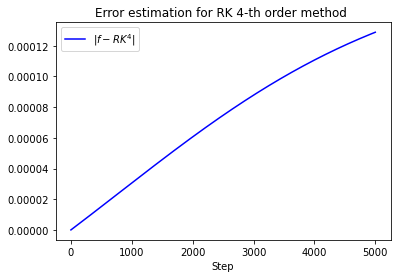

In [13]:
plt.plot(np.abs(rkfixed() - F_u(np.linspace(0, 2, 5001))), color = 'blue',
        label = r'$|f - RK^4|$')
plt.legend()
plt.title('Error estimation for RK 4-th order method ')
plt.xlabel('Step')

5. Вычислить разность решений, полученных в пункте 3 и в пункте 4 и сравнить с оценкой погрешности в пункте 3.

Text(0.5, 0, 'Step')

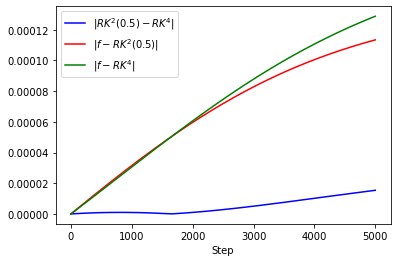

In [14]:
plt.plot(np.abs(runge_kutt(0.5) - rkfixed()),
         label = r'$|RK^2(0.5) - RK^4|$',
         color = 'blue')
plt.plot(np.abs(F_u(np.linspace(0, 2, 5001)) - runge_kutt(0.5)),
        color = 'red', label = r'$|f - RK^2(0.5)|$')
plt.plot(np.abs(F_u(np.linspace(0, 2, 5001)) - rkfixed()),
        color = 'green', label = r'$|f - RK^4|$')
plt.legend()
plt.xlabel('Step')

6. Сравнить полученные решения графически.

Text(0.5, 1.0, "Different methonds' solutions")

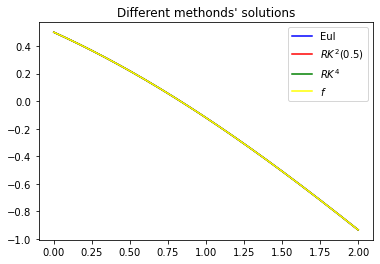

In [15]:
x = np.linspace(0, 2, 5001)
plt.plot(x, euler(), color = 'blue',
        label = 'Eul')
plt.plot(x, runge_kutt(0.5), color = 'red',
        label = r'$RK^2(0.5)$')
plt.plot(x, rkfixed(), color = 'green',
        label = r'$RK^4$')
plt.plot(x, F_u(x), color = 'yellow',
        label = r'$f$')
plt.legend()
plt.title("Different methonds' solutions")

Метод Эйлера в данном случае даёт наименьшую абсолютную погрешность.
Чем больше интервал решения, тем больше абсолютная погрешность.